# Ordered merges

In [2]:
import pandas as pd 
# pandas.DataFrame_name.sort_values(['Element1','el2'])
software = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Sales/feb-sales-Software.csv', parse_dates=['Date']).sort_values('Date', ascending=True)
software.head(10)

,Date,Company,Product,Units
2,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
3,2015-02-05 01:53:06,Acme Coporation,Software,19
5,2015-02-09 13:09:55,Mediacore,Software,7
4,2015-02-11 20:03:08,Initech,Software,7
6,2015-02-11 22:50:44,Hooli,Software,4
0,2015-02-16 12:09:19,Hooli,Software,10
8,2015-02-21 05:01:26,Mediacore,Software,3


In [3]:
hardware = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Sales/feb-sales-Hardware.csv', parse_dates=['Date']).sort_values('Date')
hardware.head()

,Date,Company,Product,Units
3,2015-02-02 20:54:49,Mediacore,Hardware,9
0,2015-02-04 21:52:45,Acme Coporation,Hardware,14
1,2015-02-07 22:58:10,Acme Coporation,Hardware,1
2,2015-02-19 10:59:33,Mediacore,Hardware,16
4,2015-02-21 20:41:47,Hooli,Hardware,3


## 1.1. Using merge() 

* attempting to merge yields an empty DataFrame because it's doing an INNER join on all columns with matching names by defaults
    * 'Units' and 'Date' columns have no overlapping values, so the result is empty

In [4]:
sales_merge = pd.merge(hardware, software)
sales_merge


,Date,Company,Product,Units


In [5]:
sales_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     0 non-null      datetime64[ns]
 1   Company  0 non-null      object        
 2   Product  0 non-null      object        
 3   Units    0 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 0.0+ bytes


## 1.2.  Using merge(how = 'outer') 

In [6]:
sales_merge = pd.merge(hardware, software, how='outer')
sales_merge.head(14)

,Date,Company,Product,Units
0,2015-02-02 20:54:49,Mediacore,Hardware,9
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
3,2015-02-19 10:59:33,Mediacore,Hardware,16
4,2015-02-21 20:41:47,Hooli,Hardware,3
5,2015-02-02 08:33:01,Hooli,Software,3
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
8,2015-02-05 01:53:06,Acme Coporation,Software,19
9,2015-02-09 13:09:55,Mediacore,Software,7


## 1.3. Sorting merge(how = 'outer') 

In [7]:
sales_merge = pd.merge(hardware, software, how='outer').sort_values('Date')
sales_merge.head(14)

,Date,Company,Product,Units
5,2015-02-02 08:33:01,Hooli,Software,3
0,2015-02-02 20:54:49,Mediacore,Hardware,9
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
8,2015-02-05 01:53:06,Acme Coporation,Software,19
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
9,2015-02-09 13:09:55,Mediacore,Software,7
10,2015-02-11 20:03:08,Initech,Software,7
11,2015-02-11 22:50:44,Hooli,Software,4


## 1.4. Using merge_ordered() 

In [8]:
# by default OUTER join 
sales_merged = pd.merge_ordered(hardware, software)
sales_merged.head(14)

,Date,Company,Product,Units
0,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-04 15:36:29,Streeplex,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14
5,2015-02-05 01:53:06,Acme Coporation,Software,19
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1
7,2015-02-09 13:09:55,Mediacore,Software,7
8,2015-02-11 20:03:08,Initech,Software,7
9,2015-02-11 22:50:44,Hooli,Software,4


## 1.5. Using on & suffixes

In [9]:
sales_merged = pd.merge_ordered(hardware, software, on=['Date', 'Company'], suffixes=['_hardware', '_software'])
sales_merged.head()

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:18,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:29,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,NaN,NaN


# 1.6. Usage of merge_ordered()

In [10]:
austin = pd.DataFrame.from_dict({'date': ['2016-01-01', '2016-02-08', '2016-01-17'], 'ratings': ['Cloudy', 'Cloudy', 'Sunny']})
houston = pd.DataFrame.from_dict({'date': ['2016-01-04', '2016-01-01', '2016-03-01'], 'ratings': ['Rainy', 'Cloudy', 'Sunny']})

In [11]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
tx_weather

,date,ratings
0,2016-01-01,Cloudy
1,2016-01-04,Rainy
2,2016-01-17,Sunny
3,2016-02-08,Cloudy
4,2016-03-01,Sunny


In [12]:
# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus','_hus'])

# Print tx_weather_suff
tx_weather_suff

,date,ratings_aus,ratings_hus
0,2016-01-01,Cloudy,Cloudy
1,2016-01-04,NaN,Rainy
2,2016-01-17,Sunny,NaN
3,2016-02-08,Cloudy,NaN
4,2016-03-01,NaN,Sunny


In [13]:
# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus','_hus'], fill_method='ffill')

# Print tx_weather_ffill
tx_weather_ffill

,date,ratings_aus,ratings_hus
0,2016-01-01,Cloudy,Cloudy
1,2016-01-04,Cloudy,Rainy
2,2016-01-17,Sunny,Rainy
3,2016-02-08,Cloudy,Rainy
4,2016-03-01,Cloudy,Sunny


## 1.7. Usage of merge_asof() 

In [17]:
oil = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Week_6/oil_price.csv', parse_dates=['Date'])
auto = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Week_6/automobiles.csv', parse_dates=['yr'])

In [18]:
oil.head()

,Date,Price
0,1970-01-01,3.35
1,1970-02-01,3.35
2,1970-03-01,3.35
3,1970-04-01,3.35
4,1970-05-01,3.35


In [19]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970-01-01,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970-01-01,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970-01-01,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970-01-01,US,ford torino


In [20]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
merged.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
387,27.0,4,140.0,86,2790,15.6,1982-01-01,US,ford mustang gl,1982-01-01,33.85
388,44.0,4,97.0,52,2130,24.6,1982-01-01,Europe,vw pickup,1982-01-01,33.85
389,32.0,4,135.0,84,2295,11.6,1982-01-01,US,dodge rampage,1982-01-01,33.85
390,28.0,4,120.0,79,2625,18.6,1982-01-01,US,ford ranger,1982-01-01,33.85
391,31.0,4,119.0,82,2720,19.4,1982-01-01,US,chevy s-10,1982-01-01,33.85


In [21]:
# Resample merged: yearly
# Syntax: 

   #dataframe_name.resample(rule, on = 'Element')
    
yearly = merged.resample('A', on='Date')[['mpg','Price']].mean()

# Print yearly
yearly

,mpg,Price
Date,,
1970-12-31,17.689655,3.35
1971-12-31,21.111111,3.56
1972-12-31,18.714286,3.56
1973-12-31,17.100000,3.56
1974-12-31,22.769231,10.11
1975-12-31,20.266667,11.16
1976-12-31,21.573529,11.16
1977-12-31,23.375000,13.90
1978-12-31,24.061111,14.85


In [22]:
# print yearly.corr()
yearly.corr()

,mpg,Price
mpg,1.000000,0.948677
Price,0.948677,1.000000


# Exercise. Summer Olympic medals

In [24]:
import pandas as pd 
editions = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
, sep='\t')
    editions = editions[['Edition', 'Grand Total', 'City', 'Country']]
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [26]:
ioc_codes = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')
ioc_codes = ioc_codes[['Country', 'NOC']]
ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [27]:
medals = pd.read_csv('/Users/alimbekov/Desktop/Gaukhar/2024-2025/Python for Data Analysis/practice/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t', header=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]
medals

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896
...,...,...,...,...
29211,"ENGLICH, Mirko",GER,Silver,2008
29212,"MIZGAITIS, Mindaugas",LTU,Bronze,2008
29213,"PATRIKEEV, Yuri",ARM,Bronze,2008
29214,"LOPEZ, Mijain",CUB,Gold,2008


In [28]:
medals_1896=medals[(medals['Edition'] == 1896) & (medals['Medal'] == 'Gold')]
medals_1896['Athlete'].count()

64

#  Create a results table (order by the count of gold medals) of Summer Olympic Games in the particular years: 1912,1972,2000 with respect to the medals type and country.
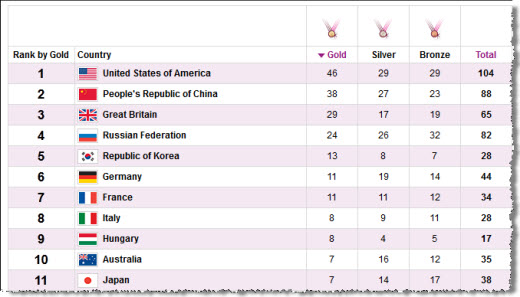

1) join medals and ioc_codes 
2) 1912,1972,2000
3) order count of gold medals

In [29]:
medals_count= medals['NOC'].value_counts()
medals_count

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
TGA       1
DJI       1
AHO       1
BDI       1
AFG       1
Name: NOC, Length: 138, dtype: int64

In [30]:
medals_1912 =medals[(medals['Edition'] == 1912)]

In [31]:
medal_cnt = medals_1912.groupby('NOC').count()
medal_cnt

,Athlete,Medal,Edition
NOC,,,
ANZ,10,10,10
AUT,14,14,14
BEL,19,19,19
CAN,8,8,8
DEN,84,84,84
FIN,67,67,67
FRA,25,25,25
GBR,160,160,160
GER,52,52,52
